In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df=df.drop('customerID',axis=1)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [12]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [13]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df1=df[df.TotalCharges!=' ']

In [15]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df1.shape

(7032, 20)

In [17]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [18]:
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [19]:
df1[df1.Churn=='Yes'].tenure

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [20]:
customer_not_leaving=df1[df1.Churn=='No'].tenure

In [21]:
customer_leaving=df1[df1.Churn=='Yes'].tenure

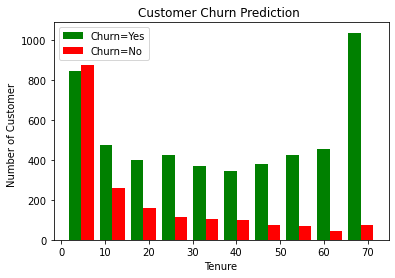

In [22]:
plt.title('Customer Churn Prediction ')
plt.xlabel('Tenure')
plt.ylabel('Number of Customer  ')
plt.hist([customer_not_leaving,customer_leaving],color=['Green','Red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [23]:
customer_not_leaving=df1[df1.Churn=='No'].MonthlyCharges

In [24]:
customer_not_leaving=df1[df1.Churn=='Yes'].MonthlyCharges

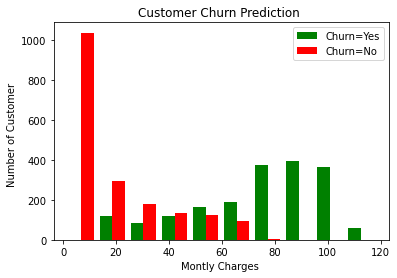

In [25]:
plt.title('Customer Churn Prediction ')
plt.xlabel('Montly Charges ')
plt.ylabel('Number of Customer  ')
plt.hist([customer_not_leaving,customer_leaving],color=['Green','Red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [26]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

/Users/fidaalibaig/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [28]:
le=LabelEncoder()
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i])

/var/folders/cv/mtf0qnws2jvbfff1vk2xrhpr0000gn/T/ipykernel_1825/1102673952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=le.fit_transform(df1[i])


In [29]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,2504,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,1465,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,156,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,1399,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,924,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,23,1,2,0,2,0,2,2,2,2,1,1,3,990,1596,0
7039,0,0,1,1,71,1,2,1,0,2,2,0,2,2,1,1,1,1339,5697,0
7040,0,0,1,1,10,0,1,0,2,0,0,0,0,0,0,1,2,137,2993,0
7041,1,1,1,0,3,1,2,1,0,0,0,0,0,0,0,1,3,794,2659,1


In [30]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
X=df1[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges',]]

In [33]:
y=df1['Churn']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [36]:
X_train.shape

(5625, 19)

In [37]:
X_test.shape

(1407, 19)

In [38]:
y_train.shape

(5625,)

In [40]:
y_test.shape

(1407,)

In [42]:
len(X_train.columns)

19

In [43]:
import tensorflow as tf
from tensorflow import keras

In [57]:
model=keras.Sequential([
    keras.layers.Dense(19,input_shape=(19,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
176/176 [==============================] - 1s 3ms/step - loss: 13.3355 - accuracy: 0.6951
Epoch 2/5
176/176 [==============================] - 1s 3ms/step - loss: 1.5200 - accuracy: 0.7438
Epoch 3/5
176/176 [==============================] - 0s 3ms/step - loss: 1.1218 - accuracy: 0.7339
Epoch 4/5
176/176 [==============================] - 0s 2ms/step - loss: 0.8907 - accuracy: 0.7344
Epoch 5/5
176/176 [==============================] - 0s 3ms/step - loss: 1.0294 - accuracy: 0.7282


In [60]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7576


[0.6460872888565063, 0.7576403617858887]

In [62]:
y_predict=model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [79]:
y_predict[0:5]

array([[0.06658725],
       [0.00125077],
       [0.24272983],
       [0.152438  ],
       [0.20451571]], dtype=float32)

In [80]:
y_test[0:5]

1320    0
5525    0
730     1
3564    0
1250    0
Name: Churn, dtype: int64

In [82]:
y_pred=[]
for i in y_predict:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [84]:
y_pred[0:10]

[0, 0, 0, 0, 0, 1, 1, 1, 0, 1]

In [86]:
y_test[0:10]

1320    0
5525    0
730     1
3564    0
1250    0
2047    0
1910    0
4101    0
4432    0
150     0
Name: Churn, dtype: int64

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1047
           1       0.52      0.58      0.55       360

    accuracy                           0.76      1407
   macro avg       0.69      0.70      0.69      1407
weighted avg       0.77      0.76      0.76      1407

